In [1]:
%cd -q ../..

import json
from collections import Counter, defaultdict
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

from scotus_metalang.diachronic_analysis import authors


In [8]:
opinions_by_author = {}
docket_numbers = set()
for author in authors.ORDERED_JUSTICES:
    opinion_paths =list(Path(f"data/cap/known_authors/{author}/").glob("*.json")) 
    num_opinions = len(opinion_paths)
    for opinion_path in opinion_paths:
        docket_numbers.add(opinion_path.name)
        
    opinions_by_author[author] = num_opinions
for author, num_opinions in opinions_by_author.items():
    print(f"{author} & {num_opinions} & {authors.ORDERED_JUSTICES[author][0]} & {authors.ORDERED_JUSTICES[author][1]}\\\\")

brennan & 163 & 1956 & 1990\\
white & 215 & 1962 & 1993\\
marshall & 141 & 1967 & 1991\\
blackmun & 234 & 1970 & 1994\\
powell & 34 & 1972 & 1987\\
rehnquist & 306 & 1972 & 2005\\
stevens & 789 & 1975 & 2010\\
oconnor & 437 & 1981 & 2006\\
scalia & 758 & 1986 & 2016\\
kennedy & 501 & 1988 & 2018\\
souter & 329 & 1990 & 2009\\
thomas & 558 & 1991 & 2100\\
ginsburg & 398 & 1993 & 2020\\
breyer & 451 & 1994 & 2022\\
roberts & 137 & 2005 & 2100\\
alito & 188 & 2006 & 2100\\
sotomayor & 140 & 2009 & 2100\\
kagan & 71 & 2010 & 2100\\
gorsuch & 30 & 2017 & 2100\\
kavanaugh & 21 & 2018 & 2100\\


In [17]:
print(f"{len(opinions_by_author)} total justices")
print(f"{len(docket_numbers)} total cases")
print(f"{sum(opinions_by_author.values())} total opinions")

20 total justices
2693 total cases
5901 total opinions


In [26]:
opinion_types_by_author = defaultdict(Counter)
for author in authors.ORDERED_JUSTICES:
    for opinion_path in Path(f"data/cap/known_authors/{author}/").glob("*.json"):
        with open(opinion_path, "r") as f:
            data = json.load(f)
            opinion_types_by_author[author][data["opinion_type"]] += 1

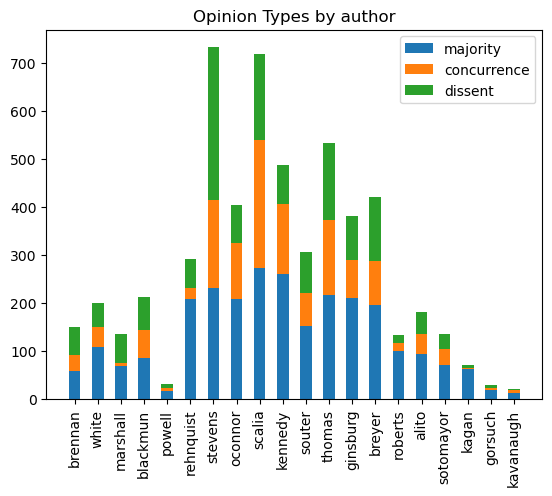

In [41]:
width = .5
bottom = np.zeros(len(authors.ORDERED_JUSTICES))
auths = list(authors.ORDERED_JUSTICES.keys())
for category in ["majority", "concurrence", "dissent"]:
    vals = [opinion_types_by_author[author].get(category, 0) for author in authors.ORDERED_JUSTICES]
    plt.bar(auths, vals, width = .5, label=category,
            bottom=bottom)
    bottom += vals

plt.xticks(rotation=90)
plt.legend()
plt.title("Opinion Types by author")
plt.savefig("figures/opinion_types_by_author.pdf")
plt.show()

In [ ]:
# Tokens per opinion
# Number of opinions
# Focal terms over time

In [ ]:


token_total = 0
for author_dir in Path("predictions").glob("*"):
    for path in author_dir.glob("*.txt"):
        opinion_predictions = np.loadtxt(path)
        token_total += len(opinion_predictions)

print(f"{token_total} total tokens")

In [34]:
total_opinions

5155

How many cases total?

How many opinions per case on average?

How many opinions per year?

How many cases per year?

Ratio of opinion types per author